In [2]:
#install libs

!pip install -U imbalanced-learn
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 699.6 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.4 MB/s eta 0:00:0000:0100:01


In [3]:
# importing libs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, auc, precision_recall_curve
from sklearn.metrics import make_scorer, f1_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from imblearn.over_sampling import SMOTE

from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings('default')

# Work with data

In [4]:
# loading data
df_train = pd.read_csv("churn_train.csv", index_col=0)
df_test = pd.read_csv("churn_test.csv", index_col=0)

df = pd.concat([df_train,df_test])

In [5]:
# check quality of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170744 entries, 0 to 42685
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  170744 non-null  float64
 1   marital_status       170739 non-null  float64
 2   job_position         170744 non-null  float64
 3   credit_sum           170743 non-null  float64
 4   credit_length        170744 non-null  float64
 5   scoring              170741 non-null  float64
 6   education            170741 non-null  float64
 7   tariff_id            170744 non-null  float64
 8   region               170552 non-null  float64
 9   average_region_wage  170552 non-null  float64
 10  income               170742 non-null  float64
 11  credit_count         161514 non-null  float64
 12  overdue_count        161514 non-null  float64
 13  churn                128058 non-null  float64
dtypes: float64(14)
memory usage: 19.5 MB


In [6]:
df.isnull().sum()

age                        0
marital_status             5
job_position               0
credit_sum                 1
credit_length              0
scoring                    3
education                  3
tariff_id                  0
region                   192
average_region_wage      192
income                     2
credit_count            9230
overdue_count           9230
churn                  42686
dtype: int64

In [7]:
# work with data (fill empty space)
# marital_status
df.marital_status.fillna(df.marital_status.mode()[0], inplace=True)

# credit_sum
df.credit_sum.fillna(df.credit_sum.mode()[0], inplace=True)

# scoring
df.scoring.fillna(df.scoring.mean(), inplace=True)

# education
df.education.fillna(df.education.mode()[0], inplace=True)

# region
df.region.fillna(df.region.mode()[0], inplace=True)

# average_region_wage
df.average_region_wage.fillna(df.average_region_wage.mode()[0], inplace=True)

# income
df.income.fillna(df.income.mean(), inplace=True)

# credit_count
df.credit_count.fillna(df.credit_count.mode()[0], inplace=True)

# overdue_count
df.overdue_count.fillna(df.overdue_count.mode()[0], inplace=True)

In [8]:
df.isnull().sum()

age                        0
marital_status             0
job_position               0
credit_sum                 0
credit_length              0
scoring                    0
education                  0
tariff_id                  0
region                     0
average_region_wage        0
income                     0
credit_count               0
overdue_count              0
churn                  42686
dtype: int64

In [9]:
df.describe()

,age,marital_status,job_position,credit_sum,credit_length,scoring,education,tariff_id,region,average_region_wage,income,credit_count,overdue_count,churn
count,170744.000000,170744.000000,170744.000000,170744.000000,170744.000000,170744.000000,170744.000000,170744.000000,170744.000000,170744.000000,170744.000000,170744.000000,170744.000000,128058.000000
mean,36.497312,3.197582,13.160006,26095.251971,10.980784,0.469472,3.202719,14.118839,42.996580,32951.140069,40138.484058,2.047445,0.043580,0.174585
std,10.546067,0.738564,3.132438,16234.800677,3.536697,0.124266,1.064024,11.546768,22.211027,12571.986331,25044.230244,1.746479,0.206015,0.379613
min,18.000000,1.000000,1.000000,2736.000000,3.000000,0.000000,1.000000,1.000000,1.000000,16830.000000,5000.000000,0.000000,0.000000,0.000000
25%,28.000000,3.000000,14.000000,14908.000000,10.000000,0.379495,2.000000,2.000000,25.000000,25520.000000,25000.000000,1.000000,0.000000,0.000000
50%,34.000000,3.000000,14.000000,21229.000000,10.000000,0.461599,4.000000,19.000000,40.000000,27390.000000,35000.000000,2.000000,0.000000,0.000000
75%,43.000000,4.000000,14.000000,32068.000000,12.000000,0.552404,4.000000,28.000000,63.000000,42460.000000,50000.000000,3.000000,0.000000,0.000000
max,71.000000,5.000000,18.000000,200000.000000,36.000000,1.128291,5.000000,33.000000,82.000000,66880.000000,950000.000000,21.000000,3.000000,1.000000


In [10]:
all_classes = df['churn'].value_counts()
all_classes

0.0    105701
1.0     22357
Name: churn, dtype: int64

Видим дисбаланс в данных, что скажется на результатах работы с построением модели (к тому же количество данных не позволяет нам это оставить без внимания, так как выборки на train и test довольно малы). Необходимо устранить этот дисбаланс.

In [11]:
# make df for scores
scores = pd.DataFrame()

# Make models for prediction

In [12]:
'''
PR AUC представляет собой площадь под кривой Precision-Recall.
Чем ближе значение PR AUC к 1, тем лучше модель способна различать классы.
Высокие значения PR AUC указывают на эффективность модели в выявлении положительных случаев.

Gini - это метрика, производная от AUC ROC (Area Under the Receiver Operating Characteristic curve).
Эта метрика измеряет способность модели различать между двумя классами, что также показывает ее способность предсказывать классы.
'''


def pr_auc_and_gini(model, model_name, y_test, X_test, df):
  #unique classes
  class_labels = np.unique(y_test)

  # list for all classes
  pr_auc_scores = []
  gini_coefficients = []

  # probability for all classes
  y_prob = model.predict_proba(X_test)

  for class_label in class_labels:
      # indexes
      class_index = np.where(model.classes_ == class_label)[0][0]
      y_prob_class = y_prob[:, class_index]
      y_true_class = (y_test == class_label).astype(int)

      # calculating PR AUC for the class
      precision, recall, _ = precision_recall_curve(y_true_class, y_prob_class)
      pr_auc = auc(recall, precision)
      pr_auc_scores.append(pr_auc)

      # calculating Gini for the class
      roc_auc = roc_auc_score(y_true_class, y_prob_class)
      gini_coefficient = 2 * roc_auc - 1
      gini_coefficients.append(gini_coefficient)

  # printing the results
  for i, class_label in enumerate(class_labels):
    data = {
            'Model': model_name,
            'Class': class_label,
            'PR AUC': pr_auc_scores[i],
            'Gini': gini_coefficients[i]
            }
    print(data)
    df = df.append(data, ignore_index=True)

  return df

In [13]:
# make the sample
X_train = df[~df.churn.isnull()].drop('churn', axis=1) # features
X_test =  df[df.churn.isnull()].drop('churn', axis=1)
y_train = df[~df.churn.isnull()]['churn']  # target

# solve the proble with disbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# define train and test samples
# with SMOTE
X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# non-balanced
X_train_tr1, X_test_tr1, y_train_tr1, y_test_tr1 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# droped data
df_for_drop = df[~df.churn.isnull()]

class_0 = df_for_drop[df_for_drop['churn'] == 0]
class_1 = df_for_drop[df_for_drop['churn'] == 1]

count_class_0, count_class_1 = df_for_drop['churn'].value_counts()
undersampled_class_0 = class_0.sample(count_class_1)

undersampled_df = pd.concat([undersampled_class_0, class_1], axis=0)

X_train_tr2, X_test_tr2, y_train_tr2, y_test_tr2 = train_test_split(undersampled_df.drop('churn', axis=1), undersampled_df['churn'], test_size=0.2, random_state=42)

In [14]:
#the sample is balanced
y_resampled.value_counts()

0.0    105701
1.0    105701
Name: churn, dtype: int64

## The best model: CatBoosting

In [15]:
model = CatBoostClassifier(iterations=300, learning_rate=0.1, depth=8, loss_function='CrossEntropy')

model.fit(X_train_tr, y_train_tr, eval_set=(X_test_tr, y_test_tr), verbose=100)
clear_output()
y_pred = model.predict(X_test_tr)

# calculate the score
print('-'*50 + 'Final report of the model'+'-'*50)
accuracy = accuracy_score(y_test_tr, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test_tr, y_pred))
print('-'*125)
scores = pr_auc_and_gini(model, 'CatBoostClassifier', y_test_tr, X_test_tr, scores)

--------------------------------------------------Final report of the model--------------------------------------------------
Accuracy: 0.8947044771883352
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90     21186
         1.0       0.97      0.81      0.89     21095

    accuracy                           0.89     42281
   macro avg       0.91      0.89      0.89     42281
weighted avg       0.91      0.89      0.89     42281

-----------------------------------------------------------------------------------------------------------------------------
{'Model': 'CatBoostClassifier', 'Class': 0.0, 'PR AUC': 0.9341993886127304, 'Gini': 0.8988363095236098}
{'Model': 'CatBoostClassifier', 'Class': 1.0, 'PR AUC': 0.9617720732085331, 'Gini': 0.8988363095236098}


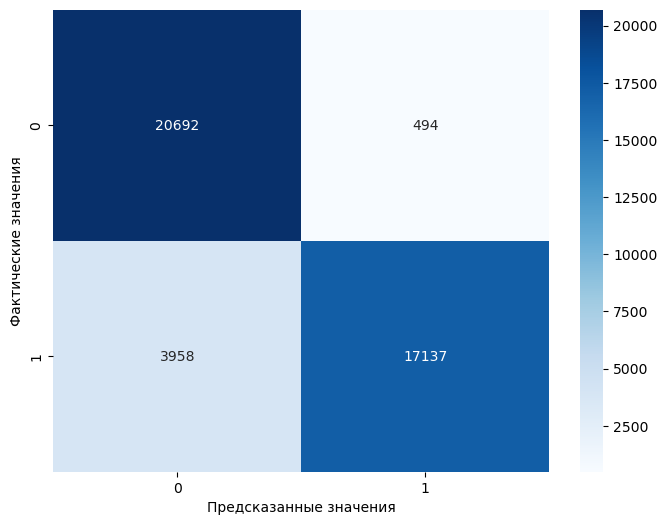

In [16]:
conf_matrix = confusion_matrix(y_test_tr, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.show()

# Conclusion

In [17]:
# it was made for many models to compare it

def highlight_gt_08(val):
  try:
    if float(val) > 0.8:
      return 'background-color: green'
    else:
        return ''
  except ValueError:
        pass

columns_to_highlight = ['PR AUC', 'Gini']
styled_scores = scores.style.applymap(highlight_gt_08, subset=pd.IndexSlice[:, columns_to_highlight])
styled_scores

,Model,Class,PR AUC,Gini
0,CatBoostClassifier,0.000000,0.934199,0.898836
1,CatBoostClassifier,1.000000,0.961772,0.898836


In [18]:
grouped_models = scores.groupby('Model')[['PR AUC', 'Gini']].mean()
grouped_models

,PR AUC,Gini
Model,,
CatBoostClassifier,0.947986,0.898836


In [19]:
grouped_class = scores.groupby('Class')[['PR AUC', 'Gini']].mean()
grouped_class

,PR AUC,Gini
Class,,
0.0,0.934199,0.898836
1.0,0.961772,0.898836


# Make prediction for all data

# Валидация (Эрдэни)

In [20]:
model = CatBoostClassifier(iterations=300, learning_rate=0.1, depth=8, loss_function='CrossEntropy')

model.fit(X_train, y_train, verbose=100)
clear_output()
y_pred = model.predict(X_test)

In [22]:
df_true = pd.read_csv("churn_y_true.csv")
y_true = df_true['churn'].values
y_true

array([0, 1, 0, ..., 0, 0, 0])

In [23]:
f1_score(y_true, y_pred, average='weighted')

0.7691275067581411

In [21]:
np.savetxt('Yana_Ivanova_test_2.csv', y_pred, delimiter=',')